# Course:  Convolutional Neural Networks for Image Classification

## Section-5
### Construct deep architectures for CNN models
#### How many Convolutional-Pooling pairs of layers?

**Description:**  
*Select deepness of network by number of convolutional and pooling layers in a sequence  
Interpret notation*

**File:** *convolutional_pooling_pairs.ipynb*

### Algorithm:

**--> Step 1:** Open preprocessed dataset  
**--> Step 2:** Convert classes vectors to binary matrices  
**--> Step 3:** Choose **number of Convolutional-Pooling pairs**  
**--> Step 4:** Visualize built CNN models  
**--> Step 5:** Set up learning rate & epochs  
**--> Step 6:** Train built CNN models  
**--> Step 7:** Show and plot accuracies  
**--> Step 8:** Make a conclusion  


**Result:**  
- Chosen architecture for every preprocessed dataset  


## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import LearningRateScheduler
from keras.utils import plot_model


## Setting up full path to preprocessed datasets

In [2]:
# Full or absolute path to 'Section4' with preprocessed datasets
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section4'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section4'
full_path_to_Section4 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section4'


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [3]:
# Opening saved custom dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' +
               'dataset_custom_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [4]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(10, 64, 64, 3)
(10,)
(3, 64, 64, 3)
(3,)
(1, 64, 64, 3)
(1,)


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [5]:
# Showing class index from the vector
print('Class index from vector:', y_train[0])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 5)
y_validation = to_categorical(y_validation, num_classes = 5)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[0])


Class index from vector: 0

(10, 5)
(3, 5)

Class index from matrix: [1. 0. 0. 0. 0.]


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Convolutional-Pooling pairs

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [6]:
# Building 1st model
# RGB --> {8C5-P2} --> 128 --> 5

# Initializing model to be as linear stack of layers
model_1 = Sequential()

# Adding first pair {8C5-P2}
model_1.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model_1.add(MaxPool2D())

# Adding fully connected layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(5, activation='softmax'))

# Compiling created model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('1st model is compiled successfully')



# Building 2nd model
# RGB --> {8C5-P2} --> {16C5-P2} --> 128 --> 5

# Initializing model to be as linear stack of layers
model_2 = Sequential()

# Adding first pair {8C5-P2}
model_2.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model_2.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_2.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_2.add(MaxPool2D())

# Adding fully connected layers
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(5, activation='softmax'))

# Compiling created model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('2nd model is compiled successfully')



# Building 3rd model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 5

# Initializing model to be as linear stack of layers
model_3 = Sequential()

# Adding first pair {8C5-P2}
model_3.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model_3.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_3.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_3.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding fully connected layers
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(5, activation='softmax'))

# Compiling created model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('3rd model is compiled successfully')



# Building 4th model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 5

# Initializing model to be as linear stack of layers
model_4 = Sequential()

# Adding first pair {8C5-P2}
model_4.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model_4.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_4.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_4.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fourth pair {64C5-P2}
model_4.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fully connected layers
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(5, activation='softmax'))

# Compiling created model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('4th model is compiled successfully')


1st model is compiled successfully
2nd model is compiled successfully
3rd model is compiled successfully
4th model is compiled successfully


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

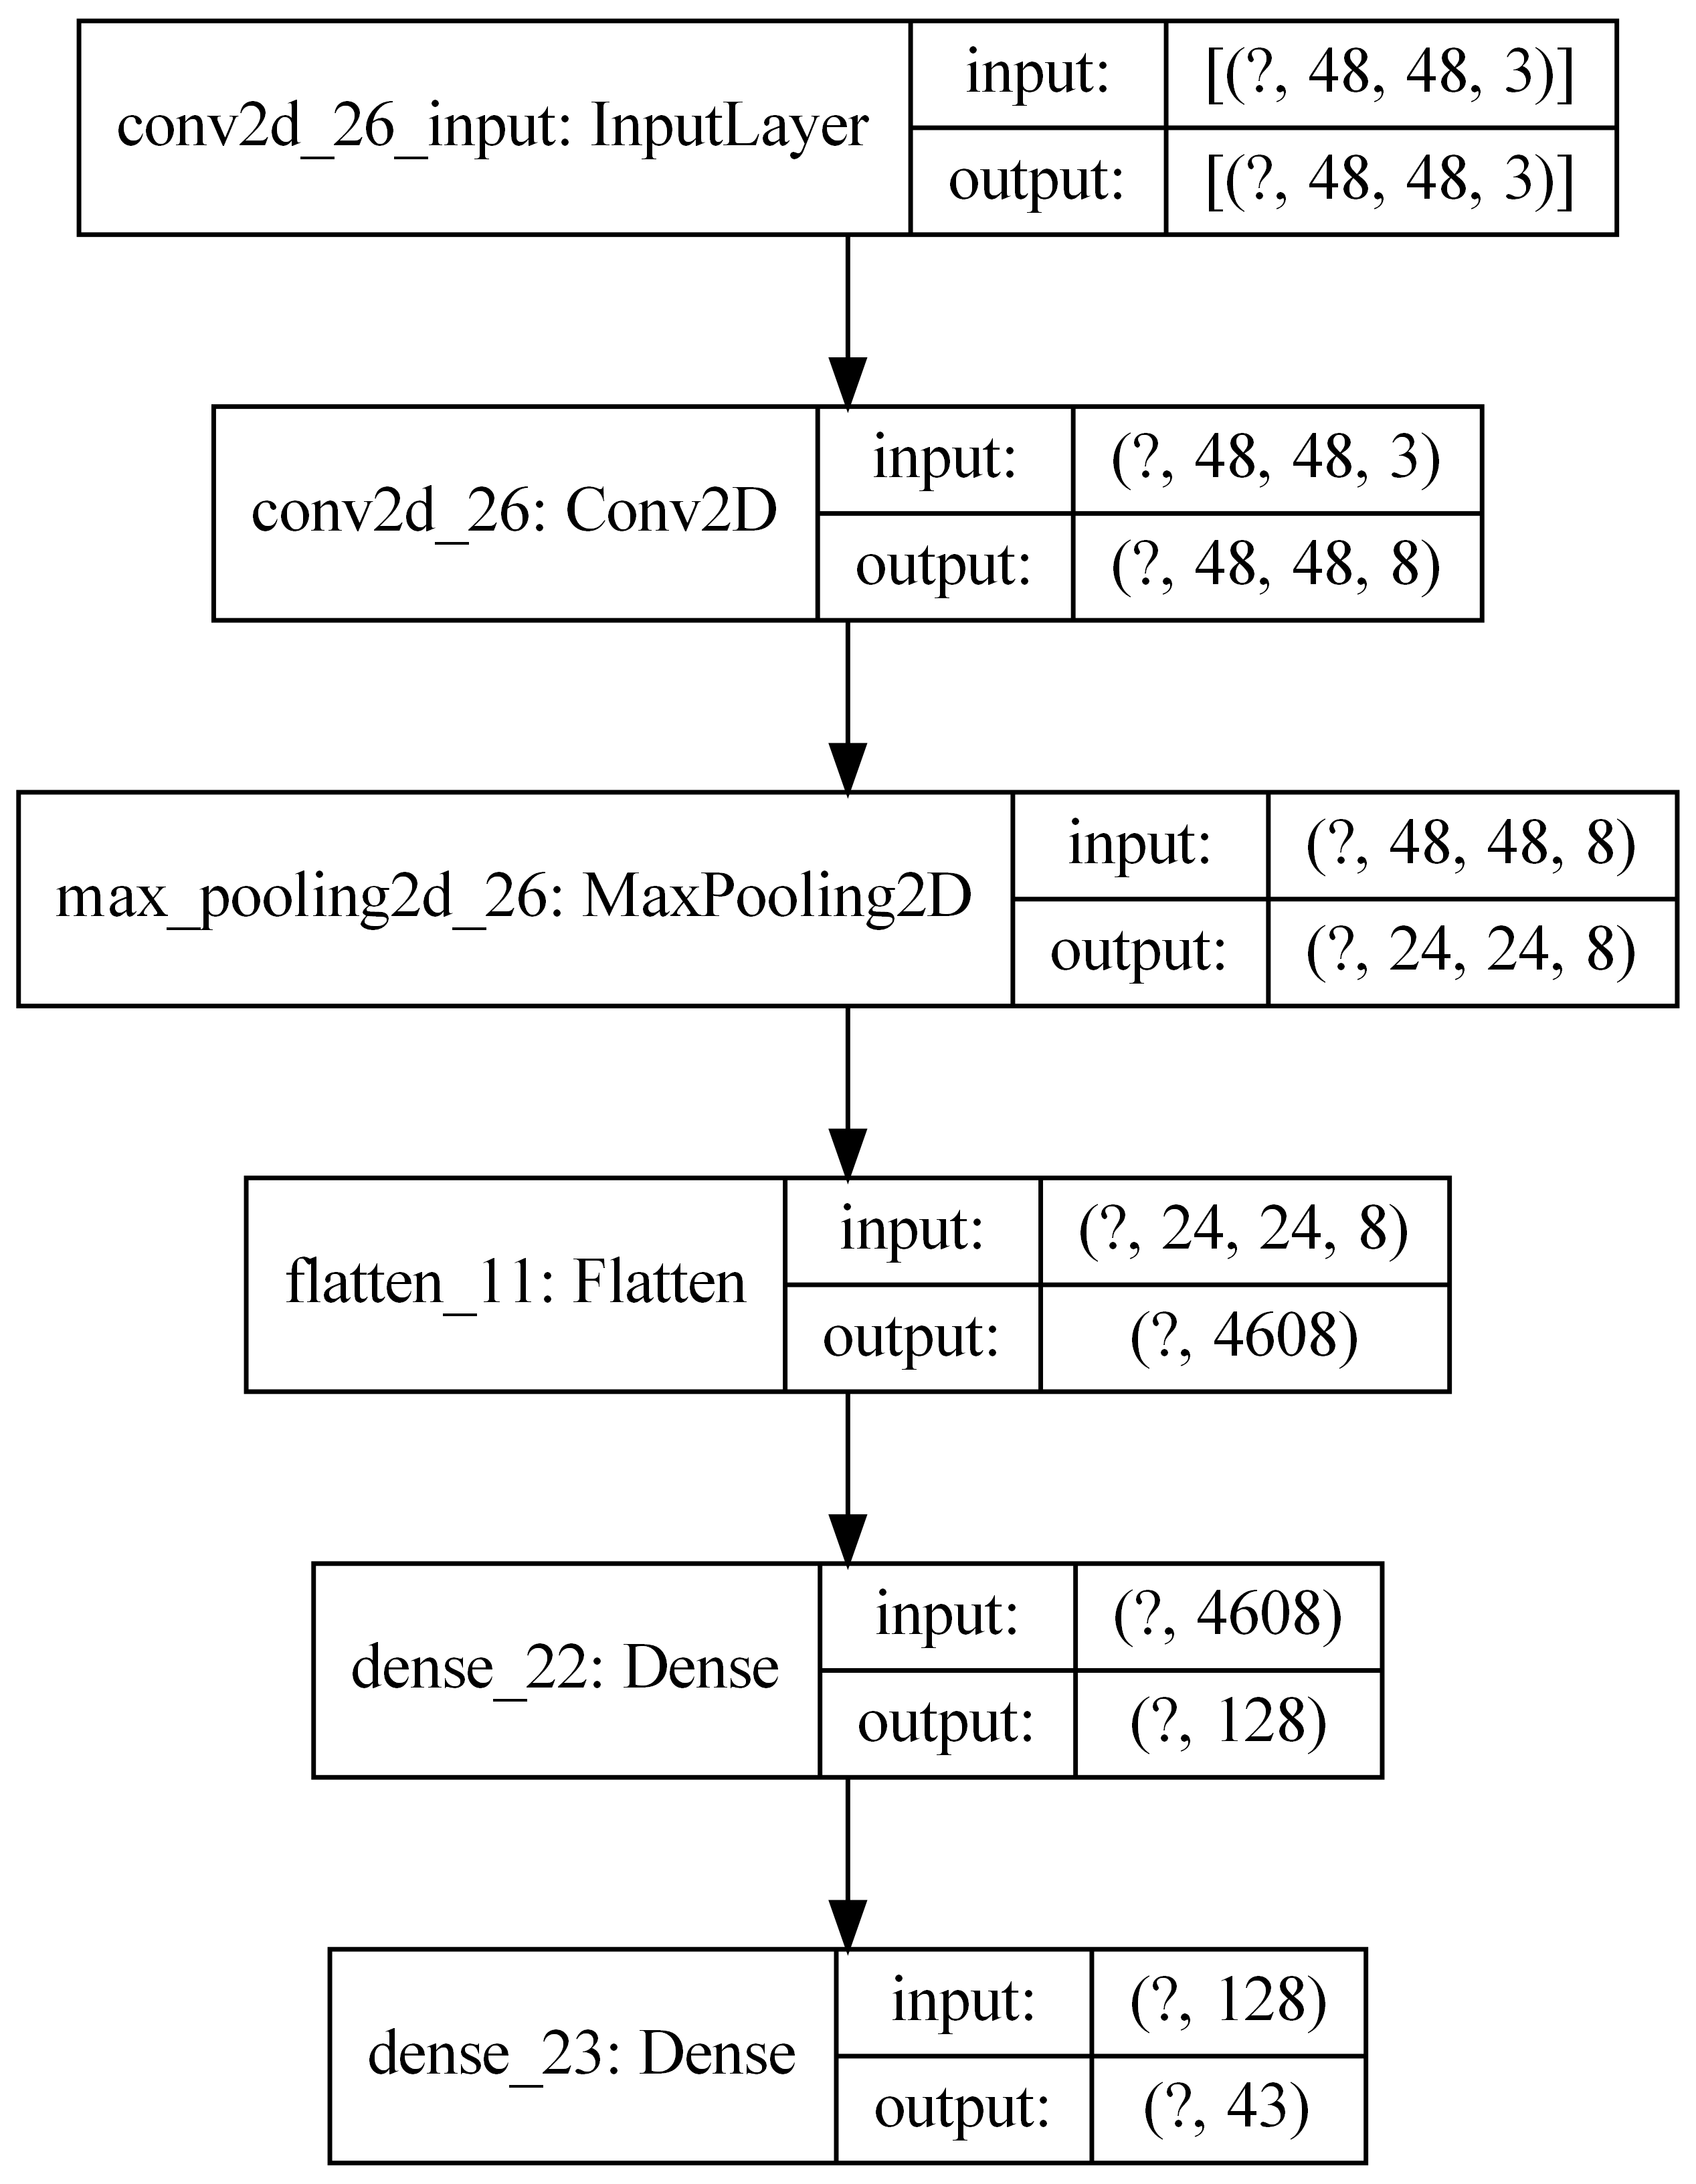

In [59]:
# Plotting model's layers in form of flowchart
plot_model(model_1,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=True,
           rankdir='TB',
           dpi=500)


In [8]:
# Showing model's summary in form of table
model_1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 1,049,957
Trainable params: 1,049,957
Non-trainable params: 0
_________________________________________________________________


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [9]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [10]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training 1st model
h_1 = model_1.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 2nd model
h_2 = model_2.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 3rd model
h_3 = model_3.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 4th model
h_4 = model_4.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
1/1 [==============================] - 0s 167ms/step - loss: 1.9456 - accuracy: 0.2000 - val_loss: 0.2285 - val_accuracy: 1.0000

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0003405616262881148.
Epoch 2/20
1/1 [==============================] - 0s 16ms/step - loss: 0.6364 - accuracy: 0.8000 - val_loss: 0.6966 - val_accuracy: 0.6667

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000323533544973709.
Epoch 3/20
1/1 [==============================] - 0s 17ms/step - loss: 0.0830 - accuracy: 1.0000 - val_loss: 1.2399 - val_accuracy: 0.6667

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00030735686772502356.
Epoch 4/20
1/1 [==============================] - 0s 14ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 1.5029 - val_accuracy: 0.6667

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0002919890243387724.
Epoch 5/20
1/1 [==

1/1 [==============================] - 0s 17ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.4487 - val_accuracy: 0.6667

Epoch 00018: LearningRateScheduler reducing learning rate to 0.00014989025404881545.
Epoch 18/20
1/1 [==============================] - 0s 18ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.4524 - val_accuracy: 0.6667

Epoch 00019: LearningRateScheduler reducing learning rate to 0.00014239574134637466.
Epoch 19/20
1/1 [==============================] - 0s 19ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.4545 - val_accuracy: 0.6667

Epoch 00020: LearningRateScheduler reducing learning rate to 0.00013527595427905592.
Epoch 20/20
1/1 [==============================] - 0s 20ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.4553 - val_accuracy: 0.6667

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
1/1 [==============================] - 0s 237ms/step - loss: 1.5998 - accuracy: 0.0000e+00 - val_l


Epoch 00014: LearningRateScheduler reducing learning rate to 0.00018402591023557584.
Epoch 14/20
1/1 [==============================] - 0s 15ms/step - loss: 0.3351 - accuracy: 1.0000 - val_loss: 0.4184 - val_accuracy: 1.0000

Epoch 00015: LearningRateScheduler reducing learning rate to 0.000174824614723797.
Epoch 15/20
1/1 [==============================] - 0s 16ms/step - loss: 0.2988 - accuracy: 1.0000 - val_loss: 0.3965 - val_accuracy: 1.0000

Epoch 00016: LearningRateScheduler reducing learning rate to 0.00016608338398760718.
Epoch 16/20
1/1 [==============================] - 0s 16ms/step - loss: 0.2656 - accuracy: 1.0000 - val_loss: 0.3748 - val_accuracy: 1.0000

Epoch 00017: LearningRateScheduler reducing learning rate to 0.0001577792147882268.
Epoch 17/20
1/1 [==============================] - 0s 14ms/step - loss: 0.2365 - accuracy: 1.0000 - val_loss: 0.3559 - val_accuracy: 1.0000

Epoch 00018: LearningRateScheduler reducing learning rate to 0.00014989025404881545.
Epoch 18/20
1

### RGB custom dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [11]:
# Accuracies of the 1st model
print('Model 1: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_1.history['accuracy']),
                                                                  max(h_1.history['val_accuracy'])))


# Accuracies of the 2nd model
print('Model 2: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_2.history['accuracy']),
                                                                  max(h_2.history['val_accuracy'])))


# Accuracies of the 3rd model
print('Model 3: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_3.history['accuracy']),
                                                                  max(h_3.history['val_accuracy'])))


# Accuracies of the 4th model
print('Model 4: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                          format(max(h_4.history['accuracy']),
                                                                 max(h_4.history['val_accuracy'])))


Model 1: Training accuracy=1.00000, Validation accuracy=1.00000
Model 2: Training accuracy=1.00000, Validation accuracy=1.00000
Model 3: Training accuracy=0.90000, Validation accuracy=1.00000
Model 4: Training accuracy=1.00000, Validation accuracy=1.00000


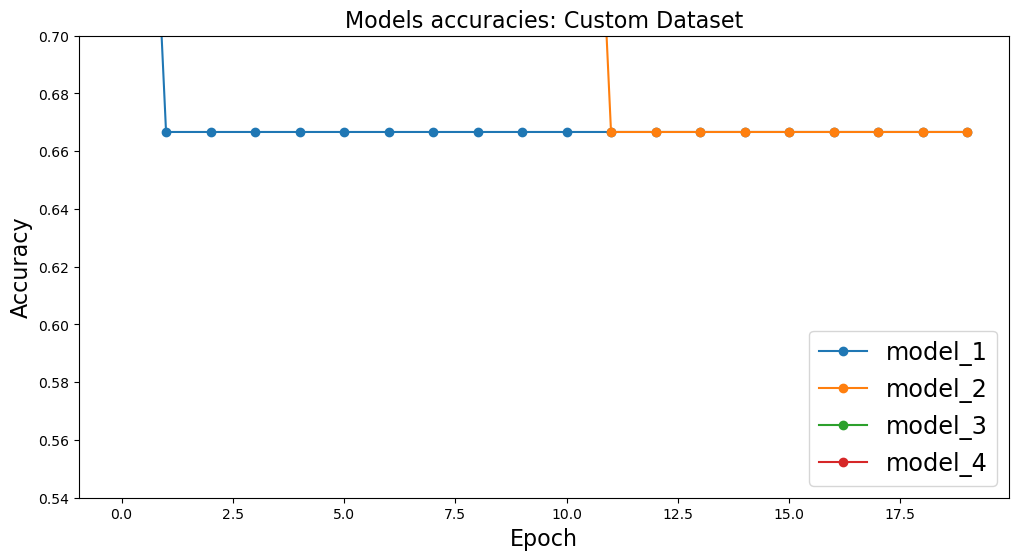

In [12]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h_1.history['val_accuracy'], '-o')
plt.plot(h_2.history['val_accuracy'], '-o')
plt.plot(h_3.history['val_accuracy'], '-o')
plt.plot(h_4.history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.54, 0.7)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4'], loc='lower right', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: Custom Dataset', fontsize=16)


# Showing the plot
plt.show()


In [13]:
# Showing list of scheduled learning rate for every epoch
print(h_1.history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


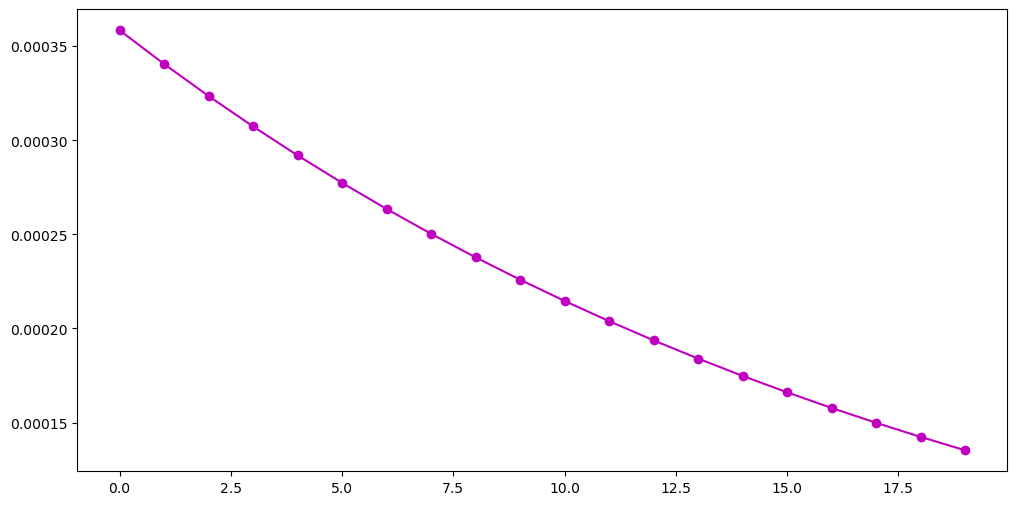

In [14]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h_1.history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [15]:
# According to validation accuracy, the 4th model has the highest value

# The choice for custom dataset is 4th model
# RGB input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 5
# GRAY input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 5

# RGB input: (64, 64, 3)
# GRAY input: (64, 64, 1)


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [16]:
# Opening saved CIFAR-10 dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + 
               'dataset_cifar10_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [17]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(42500, 32, 32, 3)
(42500,)
(7500, 32, 32, 3)
(7500,)
(10000, 32, 32, 3)
(10000,)


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [18]:
# Showing class index from the vector
print('Class index from vector:', y_train[0])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 10)
y_validation = to_categorical(y_validation, num_classes = 10)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[0])


Class index from vector: 0

(42500, 10)
(7500, 10)

Class index from matrix: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Convolutional-Pooling pairs

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [19]:
# Building 1st model
# RGB --> {8C5-P2} --> 128 --> 10

# Initializing model to be as linear stack of layers
model_1 = Sequential()

# Adding first pair {8C5-P2}
model_1.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 3)))
model_1.add(MaxPool2D())

# Adding fully connected layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

# Compiling created model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('1st model is compiled successfully')



# Building 2nd model
# RGB --> {8C5-P2} --> {16C5-P2} --> 128 --> 10

# Initializing model to be as linear stack of layers
model_2 = Sequential()

# Adding first pair {8C5-P2}
model_2.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 3)))
model_2.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_2.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_2.add(MaxPool2D())

# Adding fully connected layers
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

# Compiling created model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('2nd model is compiled successfully')



# Building 3rd model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 10

# Initializing model to be as linear stack of layers
model_3 = Sequential()

# Adding first pair {8C5-P2}
model_3.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 3)))
model_3.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_3.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_3.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding fully connected layers
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

# Compiling created model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('3rd model is compiled successfully')



# Building 4th model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C2-P2} --> 128 --> 10

# Initializing model to be as linear stack of layers
model_4 = Sequential()

# Adding first pair {8C5-P2}
model_4.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 3)))
model_4.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_4.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_4.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fourth pair {64C5-P2}
model_4.add(Conv2D(64, kernel_size=2, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fully connected layers
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(10, activation='softmax'))

# Compiling created model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('4th model is compiled successfully')


1st model is compiled successfully
2nd model is compiled successfully
3rd model is compiled successfully
4th model is compiled successfully


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

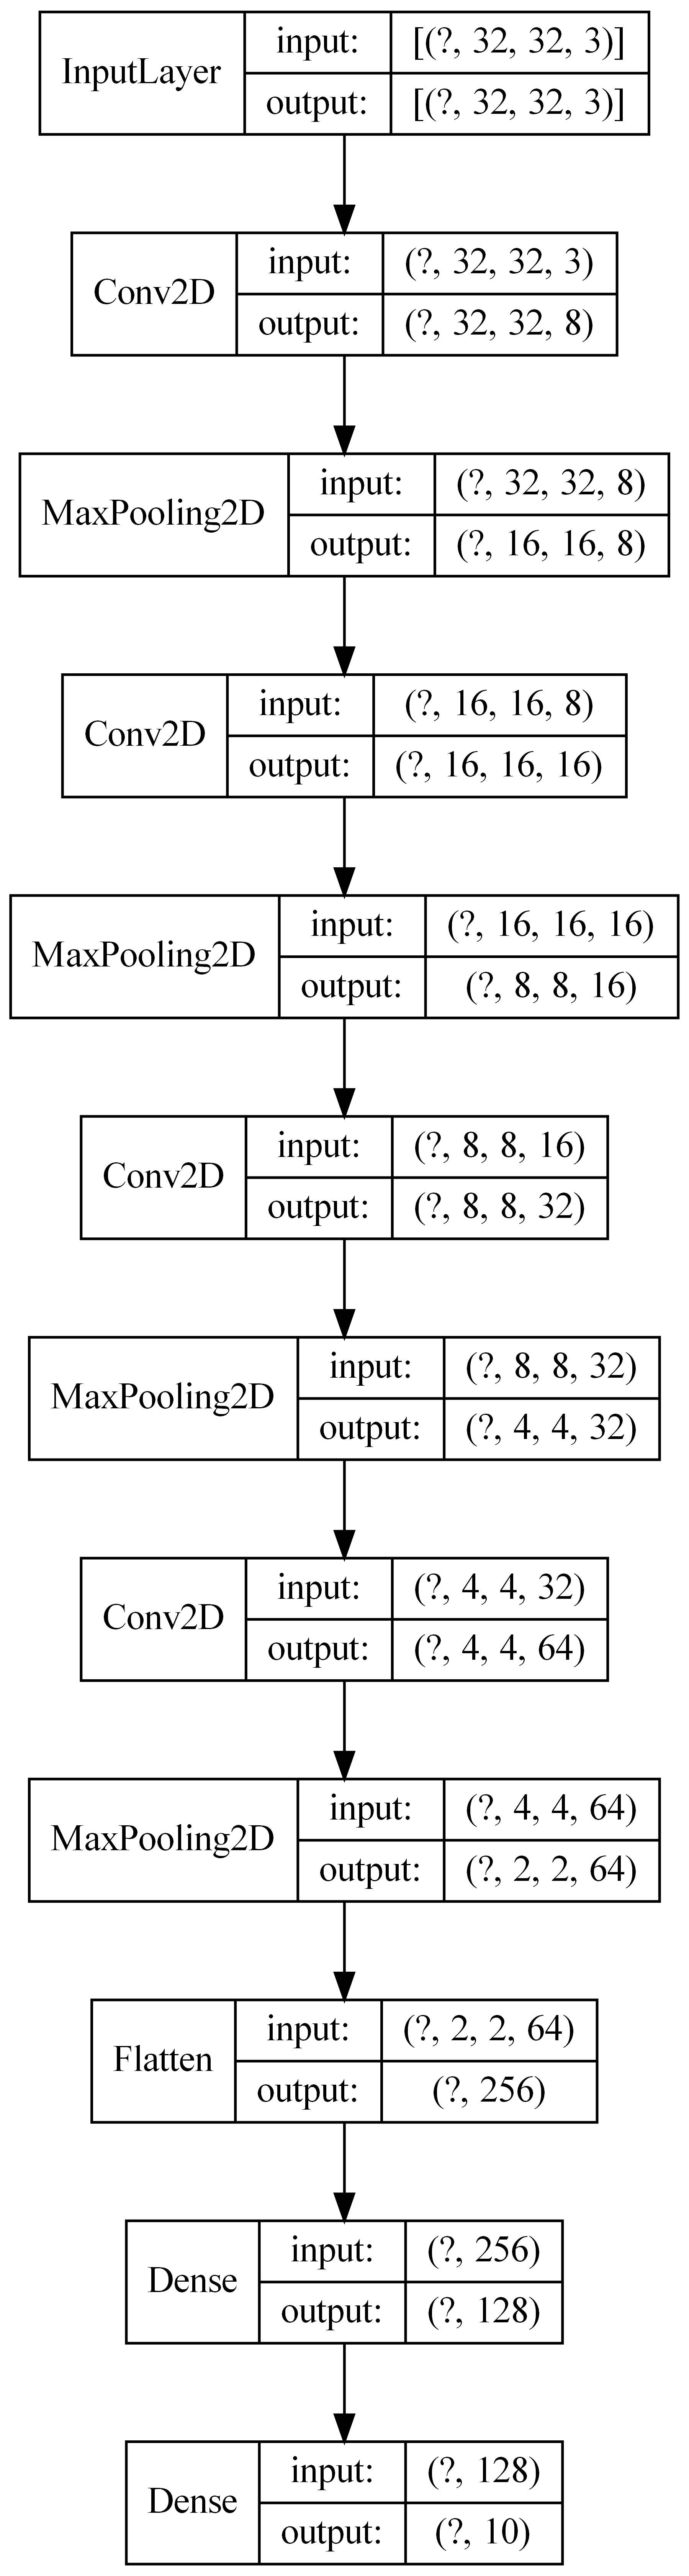

In [20]:
# Plotting model's layers in form of flowchart
plot_model(model_4,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500) 

# show_layer_names = True
# rankdir = 'LR'


In [21]:
# Showing model's summary in form of table
model_4.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 8)         608       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 16)        3216      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 64)         

### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [22]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [23]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training 1st model
h_1 = model_1.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 2nd model
h_2 = model_2.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 3rd model
h_3 = model_3.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 4th model
h_4 = model_4.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
850/850 [==============================] - 13s 15ms/step - loss: 1.6095 - accuracy: 0.4328 - val_loss: 1.4062 - val_accuracy: 0.5029

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0003405616262881148.
Epoch 2/20
850/850 [==============================] - 13s 15ms/step - loss: 1.3020 - accuracy: 0.5472 - val_loss: 1.2767 - val_accuracy: 0.5499

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000323533544973709.
Epoch 3/20
850/850 [==============================] - 13s 15ms/step - loss: 1.1540 - accuracy: 0.5972 - val_loss: 1.2033 - val_accuracy: 0.5793

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00030735686772502356.
Epoch 4/20
850/850 [==============================] - 14s 16ms/step - loss: 1.0579 - accuracy: 0.6320 - val_loss: 1.1663 - val_accuracy: 0.5876

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0002919890243387724.

850/850 [==============================] - 20s 24ms/step - loss: 0.6023 - accuracy: 0.7949 - val_loss: 1.0596 - val_accuracy: 0.6519

Epoch 00017: LearningRateScheduler reducing learning rate to 0.0001577792147882268.
Epoch 17/20
850/850 [==============================] - 20s 23ms/step - loss: 0.5787 - accuracy: 0.8019 - val_loss: 1.0737 - val_accuracy: 0.6521

Epoch 00018: LearningRateScheduler reducing learning rate to 0.00014989025404881545.
Epoch 18/20
850/850 [==============================] - 23s 27ms/step - loss: 0.5561 - accuracy: 0.8118 - val_loss: 1.1009 - val_accuracy: 0.6484

Epoch 00019: LearningRateScheduler reducing learning rate to 0.00014239574134637466.
Epoch 19/20
850/850 [==============================] - 23s 27ms/step - loss: 0.5340 - accuracy: 0.8177 - val_loss: 1.1009 - val_accuracy: 0.6535

Epoch 00020: LearningRateScheduler reducing learning rate to 0.00013527595427905592.
Epoch 20/20
850/850 [==============================] - 21s 25ms/step - loss: 0.5151 - acc

850/850 [==============================] - 24s 28ms/step - loss: 0.8176 - accuracy: 0.7130 - val_loss: 1.0225 - val_accuracy: 0.6451

Epoch 00013: LearningRateScheduler reducing learning rate to 0.00019371148445850088.
Epoch 13/20
850/850 [==============================] - 23s 28ms/step - loss: 0.7944 - accuracy: 0.7231 - val_loss: 1.0267 - val_accuracy: 0.6495

Epoch 00014: LearningRateScheduler reducing learning rate to 0.00018402591023557584.
Epoch 14/20
850/850 [==============================] - 23s 27ms/step - loss: 0.7773 - accuracy: 0.7287 - val_loss: 1.0199 - val_accuracy: 0.6557

Epoch 00015: LearningRateScheduler reducing learning rate to 0.000174824614723797.
Epoch 15/20
850/850 [==============================] - 25s 29ms/step - loss: 0.7546 - accuracy: 0.7353 - val_loss: 1.0252 - val_accuracy: 0.6497

Epoch 00016: LearningRateScheduler reducing learning rate to 0.00016608338398760718.
Epoch 16/20
850/850 [==============================] - 19s 22ms/step - loss: 0.7375 - accu

### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [24]:
# Accuracies of the 1st model
print('Model 1: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_1.history['accuracy']),
                                                                  max(h_1.history['val_accuracy'])))


# Accuracies of the 2nd model
print('Model 2: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_2.history['accuracy']),
                                                                  max(h_2.history['val_accuracy'])))


# Accuracies of the 3rd model
print('Model 3: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_3.history['accuracy']),
                                                                  max(h_3.history['val_accuracy'])))


# Accuracies of the 4th model
print('Model 4: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                          format(max(h_4.history['accuracy']),
                                                                 max(h_4.history['val_accuracy'])))


Model 1: Training accuracy=0.87212, Validation accuracy=0.62827
Model 2: Training accuracy=0.82732, Validation accuracy=0.65347
Model 3: Training accuracy=0.78612, Validation accuracy=0.67173
Model 4: Training accuracy=0.76412, Validation accuracy=0.65947


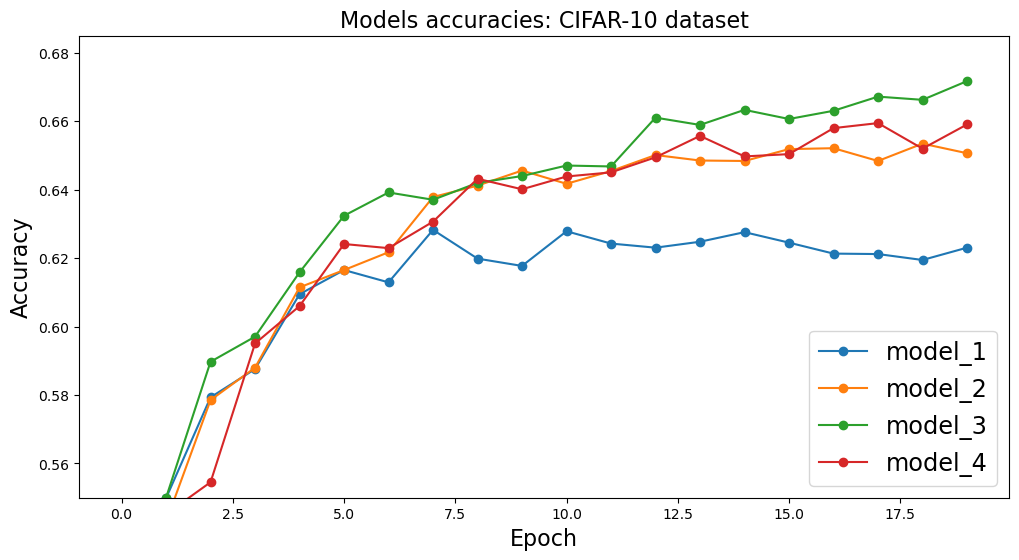

In [25]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h_1.history['val_accuracy'], '-o')
plt.plot(h_2.history['val_accuracy'], '-o')
plt.plot(h_3.history['val_accuracy'], '-o')
plt.plot(h_4.history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.55, 0.685)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4'], loc='lower right', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: CIFAR-10 dataset', fontsize=16)


# Showing the plot
plt.show()


In [26]:
# Showing list of scheduled learning rate for every epoch
print(h_1.history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


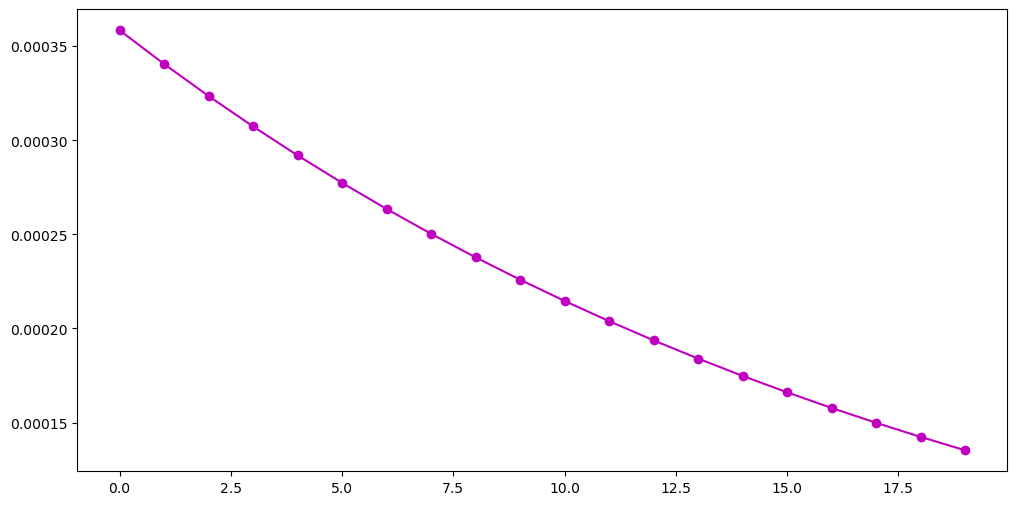

In [27]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h_1.history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [28]:
# According to validation accuracy, the 3rd model has the highest value

# The choice for CIFAR-10 dataset is 3rd model
# RGB input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 10
# GRAY input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 10

# RGB input: (32, 32, 3)
# GRAY input: (32, 32, 1)


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [29]:
# Opening saved MNIST dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' + 
               'dataset_mnist_gray_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [30]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(51000, 28, 28, 1)
(51000,)
(9000, 28, 28, 1)
(9000,)
(10000, 28, 28, 1)
(10000,)


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [31]:
# Showing class index from the vector
print('Class index from vector:', y_train[0])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 10)
y_validation = to_categorical(y_validation, num_classes = 10)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[0])


Class index from vector: 4

(51000, 10)
(9000, 10)

Class index from matrix: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Convolutional-Pooling pairs

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [32]:
# Building 1st model
# GRAY --> {8C5-P2} --> 128 --> 10

# Initializing model to be as linear stack of layers
model_1 = Sequential()

# Adding first pair {8C5-P2}
model_1.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPool2D())

# Adding fully connected layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

# Compiling created model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('1st model is compiled successfully')



# Building 2nd model
# GRAY --> {8C5-P2} --> {16C5-P2} --> 128 --> 10

# Initializing model to be as linear stack of layers
model_2 = Sequential()

# Adding first pair {8C5-P2}
model_2.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_2.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_2.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_2.add(MaxPool2D())

# Adding fully connected layers
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

# Compiling created model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('2nd model is compiled successfully')



# Building 3rd model
# GRAY --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 10

# Initializing model to be as linear stack of layers
model_3 = Sequential()

# Adding first pair {8C5-P2}
model_3.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_3.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_3.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_3.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding fully connected layers
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

# Compiling created model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('3rd model is compiled successfully')


1st model is compiled successfully
2nd model is compiled successfully
3rd model is compiled successfully


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

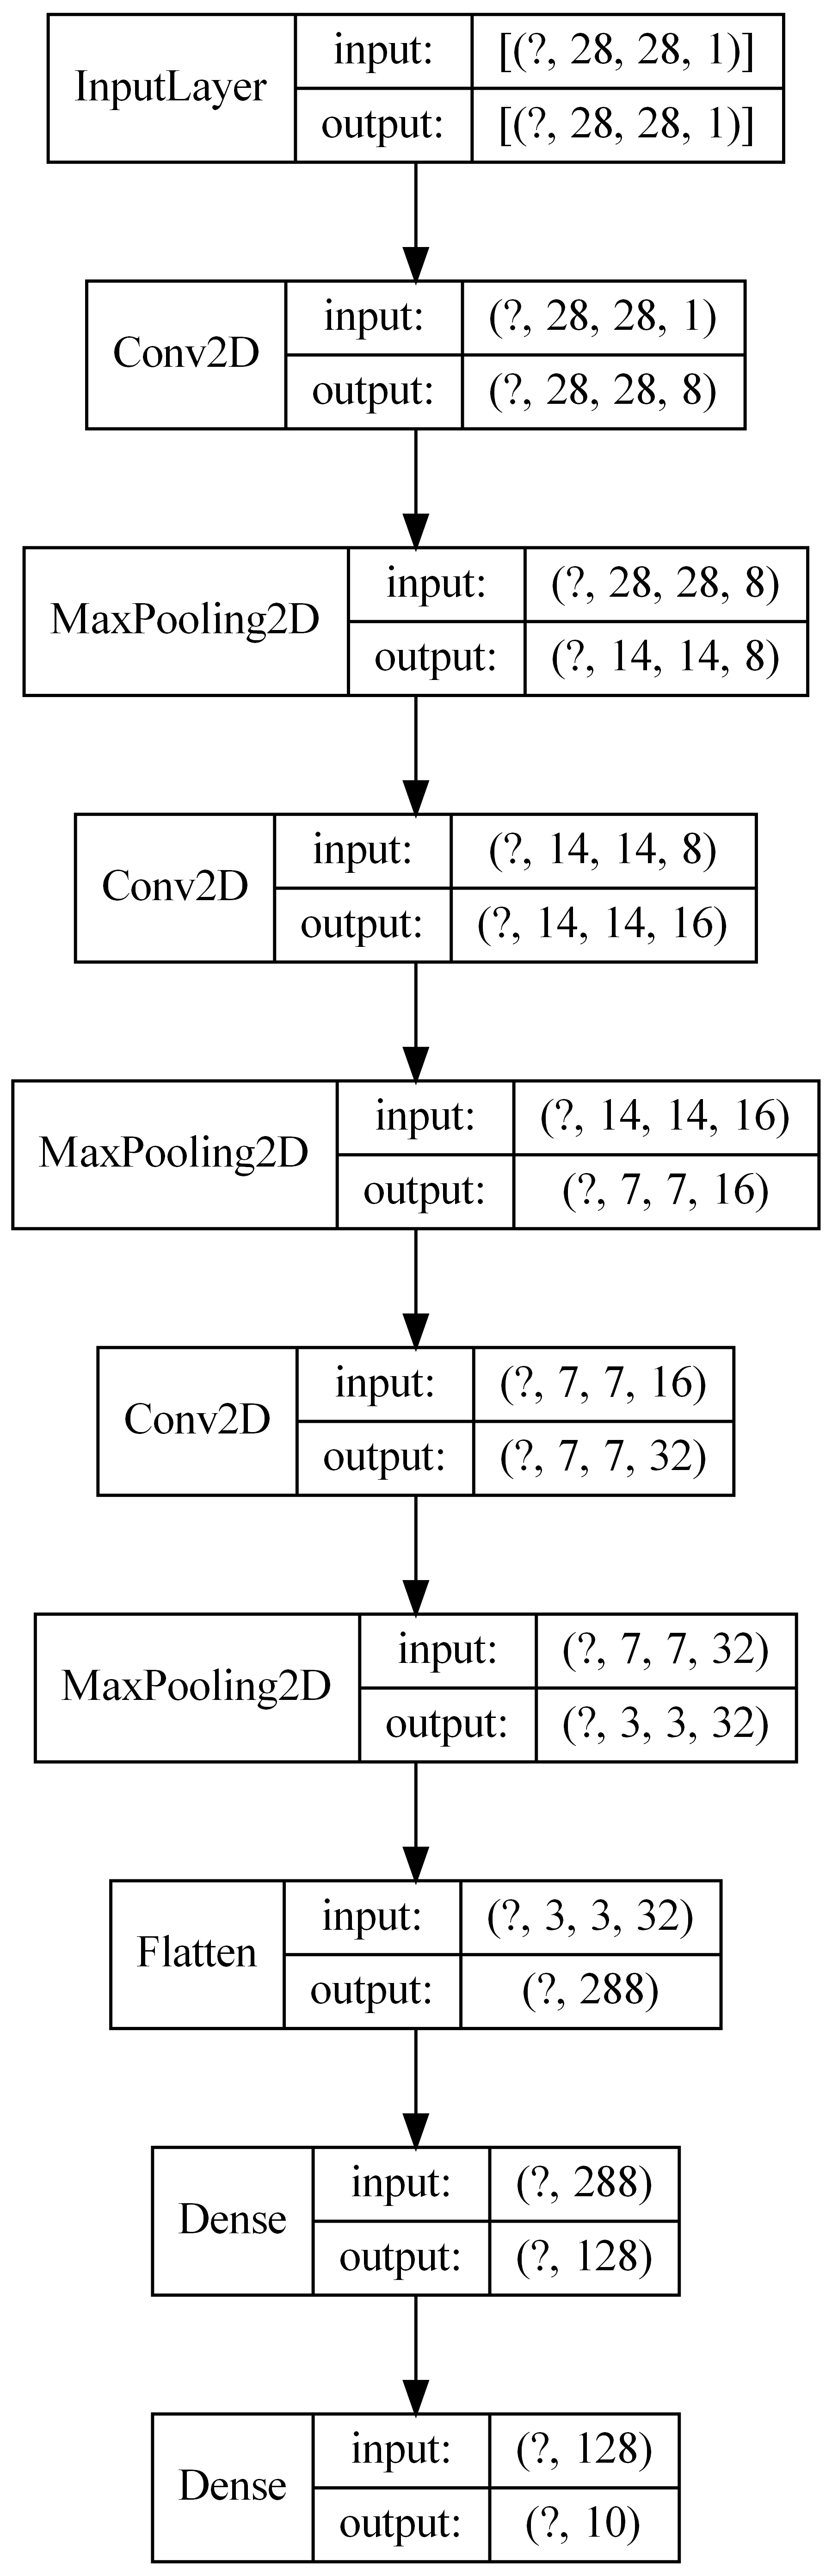

In [33]:
# Plotting model's layers in form of flowchart
plot_model(model_3,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [34]:
# Showing model's summary in form of table
model_3.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 16)        3216      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 32)          12832     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 288)             

### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [35]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [36]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training 1st model
h_1 = model_1.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 2nd model
h_2 = model_2.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 3rd model
h_3 = model_3.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
1020/1020 [==============================] - 9s 9ms/step - loss: 0.2848 - accuracy: 0.9188 - val_loss: 0.1494 - val_accuracy: 0.9632

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0003405616262881148.
Epoch 2/20
1020/1020 [==============================] - 9s 9ms/step - loss: 0.1046 - accuracy: 0.9695 - val_loss: 0.1185 - val_accuracy: 0.9726

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000323533544973709.
Epoch 3/20
1020/1020 [==============================] - 9s 9ms/step - loss: 0.0695 - accuracy: 0.9795 - val_loss: 0.1355 - val_accuracy: 0.9764

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00030735686772502356.
Epoch 4/20
1020/1020 [==============================] - 8s 8ms/step - loss: 0.0542 - accuracy: 0.9843 - val_loss: 0.1203 - val_accuracy: 0.9779

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0002919890243387724.

1020/1020 [==============================] - 16s 16ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0727 - val_accuracy: 0.9862

Epoch 00017: LearningRateScheduler reducing learning rate to 0.0001577792147882268.
Epoch 17/20
1020/1020 [==============================] - 17s 16ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0712 - val_accuracy: 0.9851

Epoch 00018: LearningRateScheduler reducing learning rate to 0.00014989025404881545.
Epoch 18/20
1020/1020 [==============================] - 17s 16ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0658 - val_accuracy: 0.9859

Epoch 00019: LearningRateScheduler reducing learning rate to 0.00014239574134637466.
Epoch 19/20
1020/1020 [==============================] - 18s 17ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0804 - val_accuracy: 0.9858

Epoch 00020: LearningRateScheduler reducing learning rate to 0.00013527595427905592.
Epoch 20/20
1020/1020 [==============================] - 15s 15ms/step - loss: 0.

### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [37]:
# Accuracies of the 1st model
print('Model 1: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_1.history['accuracy']),
                                                                  max(h_1.history['val_accuracy'])))


# Accuracies of the 2nd model
print('Model 2: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_2.history['accuracy']),
                                                                  max(h_2.history['val_accuracy'])))


# Accuracies of the 3rd model
print('Model 3: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_3.history['accuracy']),
                                                                  max(h_3.history['val_accuracy'])))


Model 1: Training accuracy=0.99963, Validation accuracy=0.98400
Model 2: Training accuracy=0.99939, Validation accuracy=0.98667
Model 3: Training accuracy=0.99925, Validation accuracy=0.98844


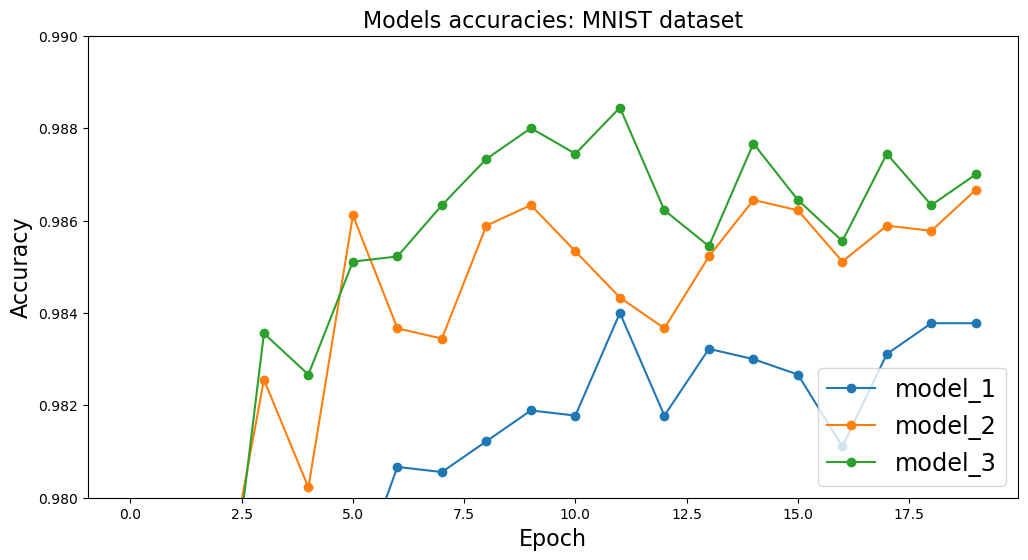

In [38]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h_1.history['val_accuracy'], '-o')
plt.plot(h_2.history['val_accuracy'], '-o')
plt.plot(h_3.history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.98, 0.99)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3'], loc='lower right', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: MNIST dataset', fontsize=16)


# Showing the plot
plt.show()


In [39]:
# Showing list of scheduled learning rate for every epoch
print(h_1.history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


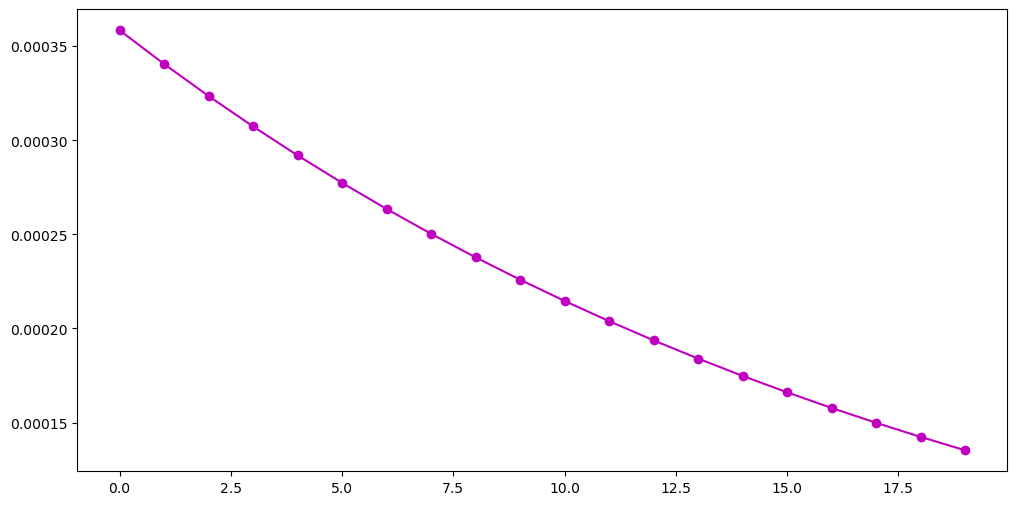

In [40]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h_1.history['lr'], '-mo')


# Showing the plot
plt.show()


### MNIST dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [41]:
# According to validation accuracy, the 3rd model has the highest value

# The choice for MNIST dataset is 3rd model
# GRAY input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 10

# GRAY input: (28, 28, 1)


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [42]:
# Opening saved Traffic Signs dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + 
               'dataset_ts_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [43]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(36288, 48, 48, 3)
(36288,)
(12440, 48, 48, 3)
(12440,)
(3111, 48, 48, 3)
(3111,)


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [44]:
# Showing class index from the vector
print('Class index from vector:', y_train[0])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 43)
y_validation = to_categorical(y_validation, num_classes = 43)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[0])


Class index from vector: 4

(36288, 43)
(12440, 43)

Class index from matrix: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Convolutional-Pooling pairs

### Notation

**C** - convolutional layer  
**P** - pooling  
  
Examples:
* **8C5** - convolutional layer with 8 feature maps and kernels of spatial size 5x5  
* **P2** - pooling operation with 2x2 window and stride 2  
*  **128** - fully connected layer (dense layer) with 128 neurons  
  
Definitions:
* **filters** (also called as kernels or cores) are trainable parameters  
* **weights** are values of filters that network learns during training  
* **strides** are steps by which window of filter size goes through the input  
* **padding** is a 0-valued frame used to process edges of the input  
  
Some keywords values:
* **kernel_size=5** sets the filter size to be 5x5
* **strides=1** is a default value
* **padding='valid'** is a default value, meaning that output will be reduced: kernel_size - 1  
* **padding='same'** means that output will be of the same spatial size as input  
* **activation='relu'** sets ReLU (Rectified Linear Unit) as activation function  
  
Calculations of spatial size for feature maps after convolutional layer:  
* **height_output = 1 + (height_input + 2 * pad - kernel_size) / stride**
* **width_output = 1 + (width_input + 2 * pad - kernel_size) / stride**
  
Example without pad frame:
* **height_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
* **width_output = 1 + (64 + 2 * 0 - 5) / 1 = 60**
  
Example with pad frame:
* **height_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
* **width_output = 1 + (64 + 2 * 2 - 5) / 1 = 64**
  

In [45]:
# Building 1st model
# RGB --> {8C5-P2} --> 128 --> 43

# Initializing model to be as linear stack of layers
model_1 = Sequential()

# Adding first pair {8C5-P2}
model_1.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(48, 48, 3)))
model_1.add(MaxPool2D())

# Adding fully connected layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(43, activation='softmax'))

# Compiling created model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('1st model is compiled successfully')



# Building 2nd model
# RGB --> {8C5-P2} --> {16C5-P2} --> 128 --> 43

# Initializing model to be as linear stack of layers
model_2 = Sequential()

# Adding first pair {8C5-P2}
model_2.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(48, 48, 3)))
model_2.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_2.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_2.add(MaxPool2D())

# Adding fully connected layers
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(43, activation='softmax'))

# Compiling created model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('2nd model is compiled successfully')



# Building 3rd model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 43

# Initializing model to be as linear stack of layers
model_3 = Sequential()

# Adding first pair {8C5-P2}
model_3.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(48, 48, 3)))
model_3.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_3.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_3.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding fully connected layers
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(43, activation='softmax'))

# Compiling created model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('3rd model is compiled successfully')



# Building 4th model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C3-P2} --> 128 --> 43

# Initializing model to be as linear stack of layers
model_4 = Sequential()

# Adding first pair {8C5-P2}
model_4.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(48, 48, 3)))
model_4.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_4.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_4.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fourth pair {64C5-P2}
model_4.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fully connected layers
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(43, activation='softmax'))

# Compiling created model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('4th model is compiled successfully')


1st model is compiled successfully
2nd model is compiled successfully
3rd model is compiled successfully
4th model is compiled successfully


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

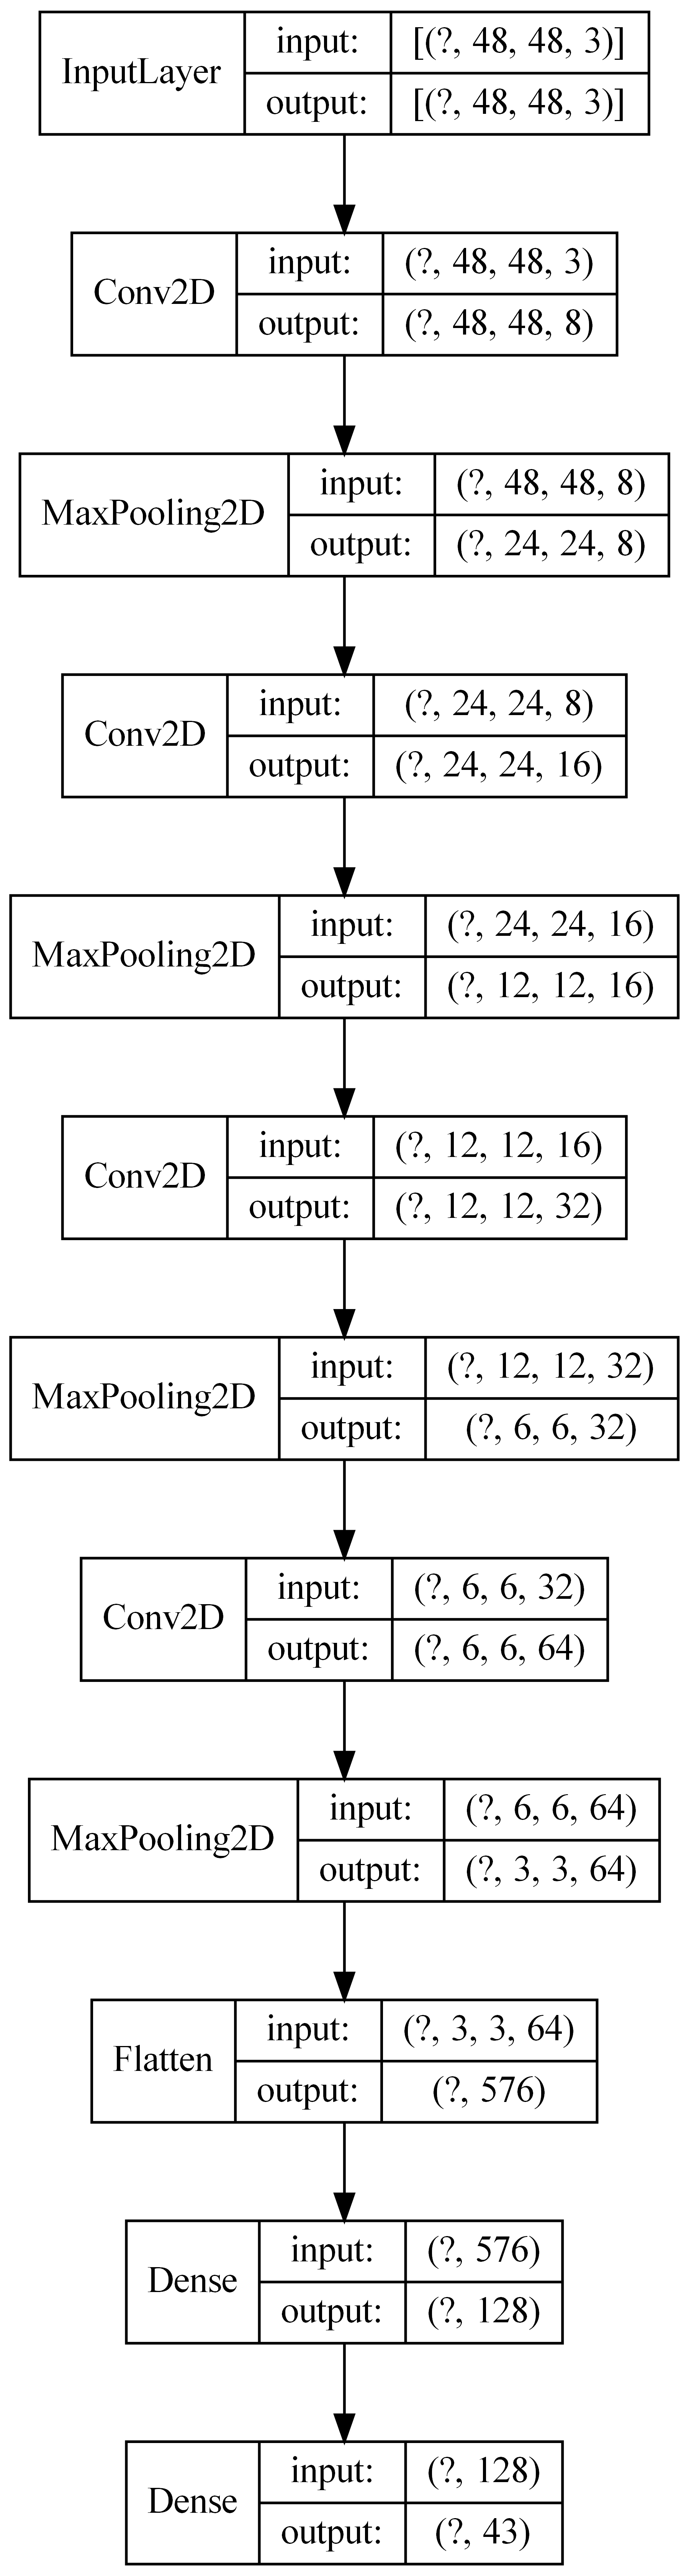

In [46]:
# Plotting model's layers in form of flowchart
plot_model(model_4,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [47]:
# Showing model's summary in form of table
model_4.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 48, 48, 8)         608       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 16)        3216      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 32)        12832     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 6, 6, 64)        

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [48]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [49]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training 1st model
h_1 = model_1.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 2nd model
h_2 = model_2.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 3rd model
h_3 = model_3.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 4th model
h_4 = model_4.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
726/726 [==============================] - 23s 31ms/step - loss: 0.7927 - accuracy: 0.7988 - val_loss: 0.3214 - val_accuracy: 0.9199

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0003405616262881148.
Epoch 2/20
726/726 [==============================] - 23s 31ms/step - loss: 0.2184 - accuracy: 0.9449 - val_loss: 0.2102 - val_accuracy: 0.9506

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000323533544973709.
Epoch 3/20
726/726 [==============================] - 20s 28ms/step - loss: 0.1357 - accuracy: 0.9664 - val_loss: 0.1586 - val_accuracy: 0.9624

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00030735686772502356.
Epoch 4/20
726/726 [==============================] - 24s 33ms/step - loss: 0.0957 - accuracy: 0.9765 - val_loss: 0.1504 - val_accuracy: 0.9631

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0002919890243387724.

726/726 [==============================] - 34s 46ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0811 - val_accuracy: 0.9847

Epoch 00017: LearningRateScheduler reducing learning rate to 0.0001577792147882268.
Epoch 17/20
726/726 [==============================] - 34s 46ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0641 - val_accuracy: 0.9900

Epoch 00018: LearningRateScheduler reducing learning rate to 0.00014989025404881545.
Epoch 18/20
726/726 [==============================] - 32s 45ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0624 - val_accuracy: 0.9901

Epoch 00019: LearningRateScheduler reducing learning rate to 0.00014239574134637466.
Epoch 19/20
726/726 [==============================] - 32s 44ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0656 - val_accuracy: 0.9879

Epoch 00020: LearningRateScheduler reducing learning rate to 0.00013527595427905592.
Epoch 20/20
726/726 [==============================] - 32s 45ms/step - loss: 0.0033 - acc


Epoch 00012: LearningRateScheduler reducing learning rate to 0.00020390682574579038.
Epoch 12/20
726/726 [==============================] - 44s 60ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0759 - val_accuracy: 0.9842

Epoch 00013: LearningRateScheduler reducing learning rate to 0.00019371148445850088.
Epoch 13/20
726/726 [==============================] - 45s 62ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.1021 - val_accuracy: 0.9802

Epoch 00014: LearningRateScheduler reducing learning rate to 0.00018402591023557584.
Epoch 14/20
726/726 [==============================] - 44s 60ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0796 - val_accuracy: 0.9843

Epoch 00015: LearningRateScheduler reducing learning rate to 0.000174824614723797.
Epoch 15/20
726/726 [==============================] - 45s 61ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0785 - val_accuracy: 0.9837

Epoch 00016: LearningRateScheduler reducing learning rate to 0.00016608338398

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [50]:
# Accuracies of the 1st model
print('Model 1: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_1.history['accuracy']),
                                                                  max(h_1.history['val_accuracy'])))


# Accuracies of the 2nd model
print('Model 2: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_2.history['accuracy']),
                                                                  max(h_2.history['val_accuracy'])))


# Accuracies of the 3rd model
print('Model 3: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_3.history['accuracy']),
                                                                  max(h_3.history['val_accuracy'])))


# Accuracies of the 4th model
print('Model 4: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                          format(max(h_4.history['accuracy']),
                                                                 max(h_4.history['val_accuracy'])))


Model 1: Training accuracy=0.99937, Validation accuracy=0.98320
Model 2: Training accuracy=0.99978, Validation accuracy=0.99011
Model 3: Training accuracy=0.99997, Validation accuracy=0.99236
Model 4: Training accuracy=1.00000, Validation accuracy=0.98939


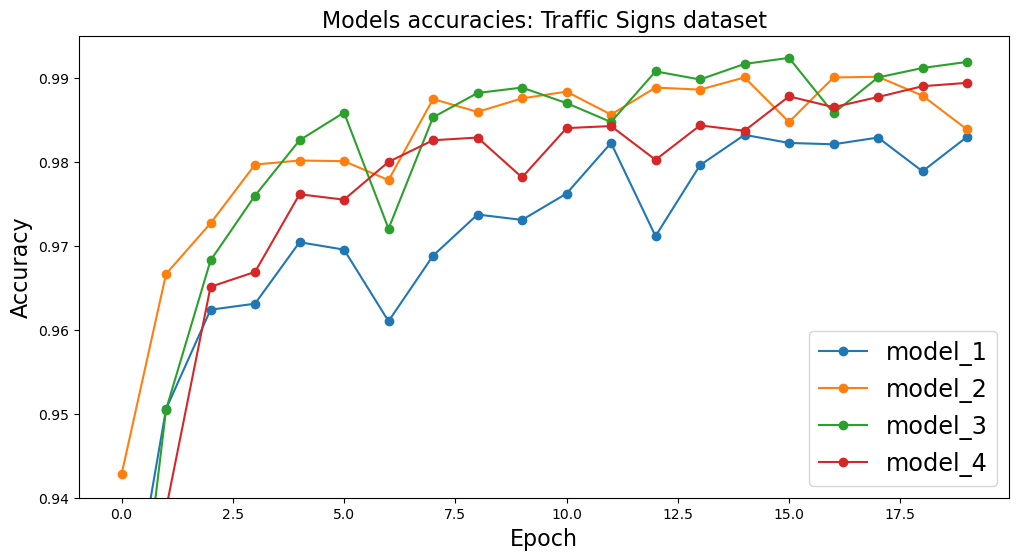

In [51]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h_1.history['val_accuracy'], '-o')
plt.plot(h_2.history['val_accuracy'], '-o')
plt.plot(h_3.history['val_accuracy'], '-o')
plt.plot(h_4.history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.94, 0.995)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4'], loc='lower right', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: Traffic Signs dataset', fontsize=16)


# Showing the plot
plt.show()


In [52]:
# Showing list of scheduled learning rate for every epoch
print(h_1.history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


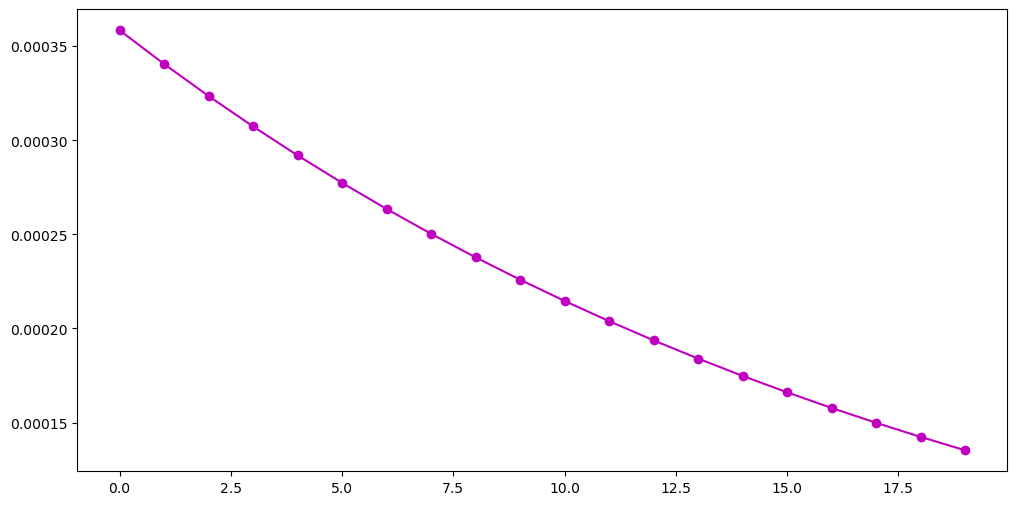

In [53]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h_1.history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [54]:
# According to validation accuracy, the 4th model has the highest value

# The choice for Traffic Signs dataset is 4th model
# RGB input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C3-P2} --> 128 --> 43
# GRAY input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C3-P2} --> 128 --> 43

# RGB input: (48, 48, 3)
# GRAY input: (48, 48, 1)


### Some comments

To get more details for usage of 'Sequential' class:  
**print(help(Sequential))**  
  
More details and examples are here:  
https://keras.io/api/models/sequential/


To get more details for usage of function 'to_categorical':  
**print(help(to_categorical))**  

More details and examples are here:  
https://keras.io/api/utils/python_utils/#to_categorical-function 


To get more details for usage of function 'plot_model':  
**print(help(plot_model))**  

More details and examples are here:  
https://keras.io/api/utils/model_plotting_utils/#plot_model-function  


To get more details for usage of function 'plt.plot':  
**print(help(plt.plot))**  

More details and examples are here:  
https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html


In [55]:
print(help(Sequential))

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [56]:
print(help(to_categorical))

Help on function to_categorical in module tensorflow.python.keras.utils.np_utils:

to_categorical(y, num_classes=None, dtype='float32')
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    Arguments:
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes. If `None`, this would be inferred
          as the (largest number in `y`) + 1.
        dtype: The data type expected by the input. Default: `'float32'`.
    
    Returns:
        A binary matrix representation of the input. The classes axis is placed
        last.
    
    Example:
    
    >>> a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
    >>> a = tf.constant(a, shape=[4, 4])
    >>> print(a)
    tf.Tensor(
      [[1. 0. 0. 0.]
       [0. 1. 0. 0.]
       [0. 0. 1. 0.]
       [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)
    
    >>> b = tf.constant([.9, 

In [57]:
print(help(plot_model))

Help on function plot_model in module tensorflow.python.keras.utils.vis_utils:

plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
    Converts a Keras model to dot format and save to a file.
    
    Example:
    
    ```python
    input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
    x = tf.keras.layers.Embedding(
        output_dim=512, input_dim=10000, input_length=100)(input)
    x = tf.keras.layers.LSTM(32)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
    model = tf.keras.Model(inputs=[input], outputs=[output])
    dot_img_file = '/tmp/model_1.png'
    tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
    ```
    
    Arguments:
      model: A Keras model instance
     

In [58]:
print(help(plt.plot))

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f